This tutorial covers some introductory material on handling images in Python.

In [12]:
! pip install opencv-python-headless
! pip install matplotlib

In [14]:
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

We are the using the opencv-python (stands for open-source computer vision) library, imported as `cv2`. It is one of the most popular computer vision libraries in Python, if not the most popular one.

We will first load an image into Python:

In [16]:
# Get the image from the URL
url = "https://raw.githubusercontent.com/BenjaminArold/Course_Text_Data_2024/main/notebooks/cat.png"
resp = requests.get(url, stream=True).raw

# Convert the data to a numpy array and read it into an OpenCV image
image_arr = np.asarray(bytearray(resp.read()), dtype="uint8")
cat_image = cv2.imdecode(image_arr, cv2.IMREAD_COLOR)

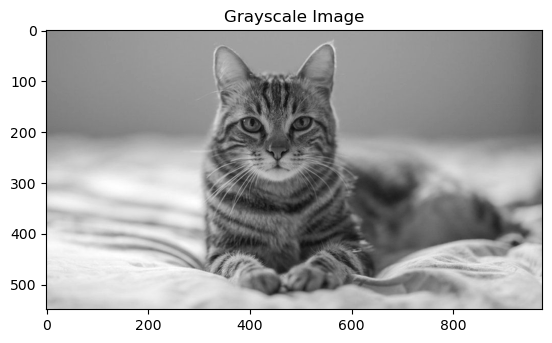

In [18]:
# Show the image in grayscale
# We convert the image to grayscale using cv2.cvtColor
grey_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY)

# Display the greyscale image using matplotlib
plt.imshow(grey_image, cmap='gray')
plt.title('Grayscale Image')
# plt.axis('off')
plt.show()

# Inspect the image: What do the values on the axes represent?

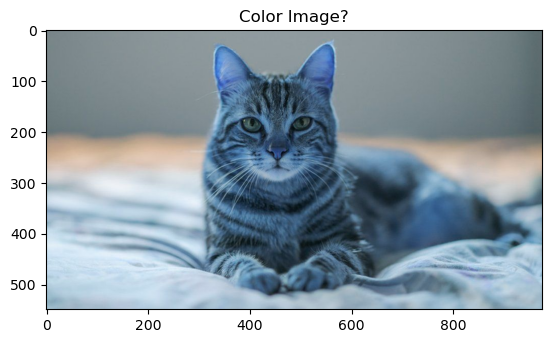

In [11]:
# Let's show the image in color
plt.figure()
plt.imshow(cat_image)
plt.title('Color Image?')
# plt.axis('off')
plt.show()

# Inspect the image: Does it look alright?

In [13]:
# In cv2, BGR is the default color order. matplotlib uses RGB instead.
# That is, matplotlib assumes it reads an image in the channel order RGB, while we actually read it as BGR when we opened it with cv2

# We can deal with this by converting the image to RGB before plotting
rgb_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)

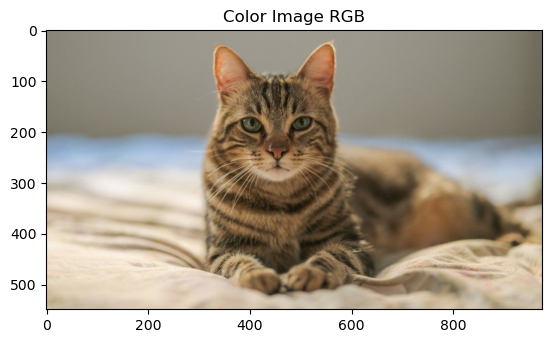

In [15]:
# Display the color image using matplotlib
plt.imshow(rgb_image)
plt.title('Color Image RGB')
plt.show()

# There are many ways to read an image in Python, feel free to experiment (matplotlib, scikit-image, pillow (PIL))

Next, let's experiment with some basic image processing tasks.

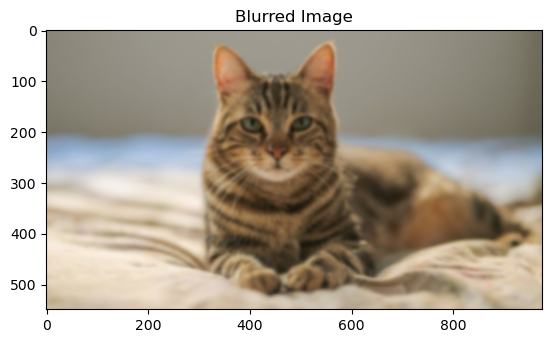

In [17]:
# Let's apply some filters
# Applying a GaussianBlur filter
blurred_image = cv2.GaussianBlur(rgb_image, (15, 15), 0)

# (15,15) is the ksize argument: the size of the Gaussian kernel
# It is a tuple representing the width and height of the kernel
# The values should be odd and can be different from each other

# Display the blurred image
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

# You can experiment with bigger and smaller kernel sizes

Any ideas why we would want to blur images for further processing?

Next, let's do some edge detection.

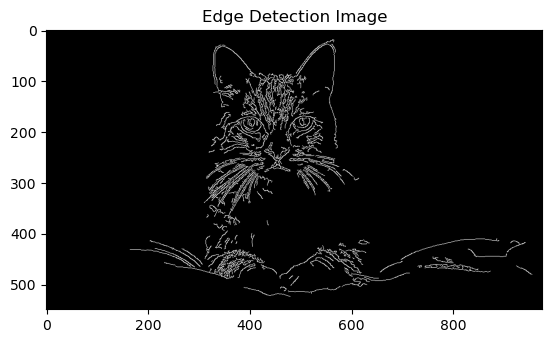

In [19]:
# Applying edge detection using the Canny method
edges_image = cv2.Canny(rgb_image, 100, 200)

# Display the edge detection image using matplotlib
plt.imshow(edges_image, cmap='gray')
plt.title('Edge Detection Image')
plt.show()

The Canny edge detection method is a combination of different algorithms. The key components are noise reduction (smoothing using a Gaussian filter), gradient calculation (the gradient magnitude and direction of each pixel are calculated, to identify the edges and their orientations), non-maximum suppression (suppress any pixel value which is not on the edge, to thin the edges), and edge tracking by hysteresis (using the two threshold values).

In [ ]:
# The (100,200) argument above shows the gradient magnitude threshold
# Simply put, pixels with magnitudes above the higher value are certainly part of edges ("strong edges"), those below the lower one certainly not
# For those in between (so called "weak edges"), we are checking whether they are connected to strong edges

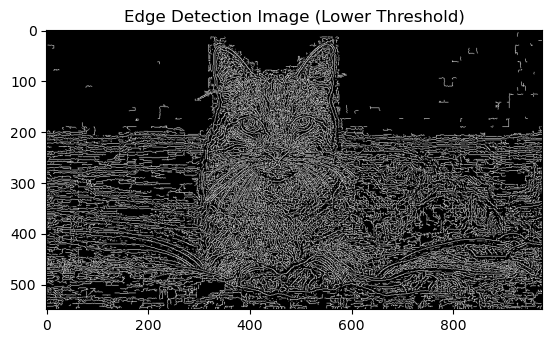

In [21]:
# Applying edge detection using the Canny method
edges_image_low = cv2.Canny(rgb_image, 10, 20)

# Display the edge detection image using matplotlib
plt.imshow(edges_image_low, cmap='gray')
plt.title('Edge Detection Image (Lower Threshold)')
plt.show()

For which downstream tasks could edge detection be helpful?

For example, edge detection can be one helpful component to identify "Haar-like" features (more on this later). Haar-like features are used in pre-neural net object detection, including face detection. For instance, the Viola-Jones object detection framework uses Haar-like features. Let's try out an implementation of the Viola-Jones algorithm for face detection.

In [35]:
# First, load an image with a face (faces?) on it

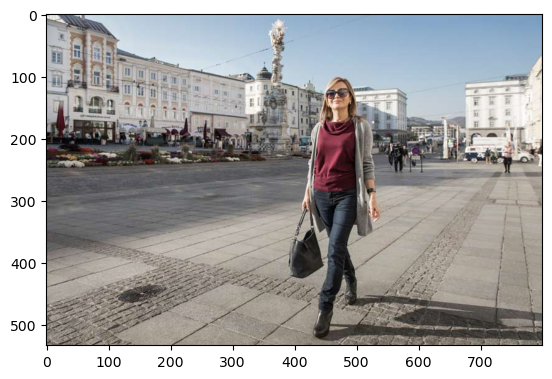

In [58]:
# Get the image from the URL
url = "https://raw.githubusercontent.com/BenjaminArold/Course_Text_Data_2024/main/notebooks/people.jpg"
resp = requests.get(url, stream=True).raw

# Convert the data to a numpy array and read it into an OpenCV image
image_arr = np.asarray(bytearray(resp.read()), dtype="uint8")
people_image = cv2.cvtColor(cv2.imdecode(image_arr, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.imshow(people_image)

In [60]:
# Run CascadeClassifier to identify faces in the picture
# Load the pre-trained model for face detection from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [62]:
# Convert the people image to greyscale as the face detection works better on greyscale images
grey_people_image = cv2.cvtColor(people_image, cv2.COLOR_BGR2GRAY)

In [44]:
# Run the face detection algorithm
faces = face_cascade.detectMultiScale(grey_people_image, 1.1, 4)

# How many faces were detected?
print(len(faces))

0


In [50]:
# Let's change the parameters for a finer detection resolution
faces_finer2 = face_cascade.detectMultiScale(grey_people_image, 1.01, 3)

# The first parameter is the scale factor; by decreasing the it, the algorithm will use a finer scale to scan through the image, potentially detecting smaller objects
# This comes with higher computational cost and time
# The second parameter is the number of neighbors considered (the number of neighboring rectangles a detection candidate should have to retain it)

# How many faces were detected?
print(len(faces_finer2))

8


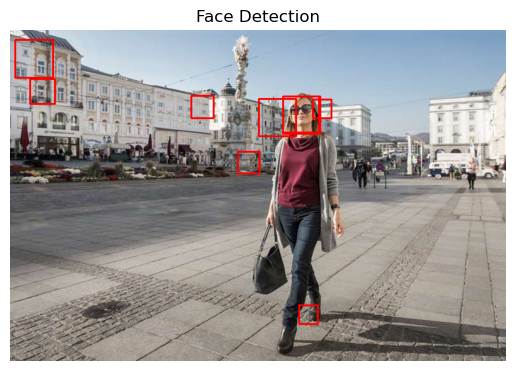

In [52]:
# Where could all these faces be?

# Let's draw rectangles around the faces and plot the image
for (x, y, w, h) in faces_finer2:
    cv2.rectangle(people_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with the rectangles drawn around the faces
plt.imshow(people_image)
plt.title('Face Detection')
plt.axis('off')
plt.show()

# The CascadeClassifier operates on different scales and looks for features that resemble face features such as eyes, nose, and the mouth region
# Sometimes it incorrectly classifies objects as faces -- if they have similar Haar-like features as faces...

In [64]:
# Let's change the parameters for a finer detection resolution
faces_finer3 = face_cascade.detectMultiScale(grey_people_image, 1.05, 3)

# The first parameter is the scale factor; by decreasing the it, the algorithm will use a finer scale to scan through the image, potentially detecting smaller objects
# This comes with higher computational cost and time
# The second parameter is the number of neighbors considered (the number of neighboring rectangles a detection candidate should have to retain it)

# How many faces were detected?
print(len(faces_finer3))

1


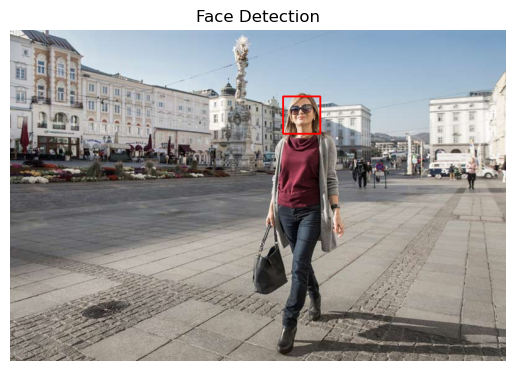

In [66]:
# Where could all these faces be?

# Let's draw rectangles around the faces and plot the image
for (x, y, w, h) in faces_finer3:
    cv2.rectangle(people_image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with the rectangles drawn around the faces
plt.imshow(people_image)
plt.title('Face Detection')
plt.axis('off')
plt.show()

# The CascadeClassifier operates on different scales and looks for features that resemble face features such as eyes, nose, and the mouth region
# Sometimes it incorrectly classifies objects as faces -- if they have similar Haar-like features as faces...